In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import sys
import numpy as np
import datetime

In [2]:
%matplotlib --list
%matplotlib

Available matplotlib backends: ['osx', 'qt4', 'qt5', 'gtk3', 'notebook', 'wx', 'qt', 'nbagg', 'gtk', 'tk', 'inline']
Using matplotlib backend: nbAgg


In [3]:
file = "g38_spot_prices.tsv"

print "Read from",file

Read from g38_spot_prices.tsv


In [4]:
data = np.loadtxt(file, delimiter="\t", usecols=(5,4,1), dtype=object,
                   converters={5: lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ"),
                               4: np.float})

us-east-1a
[ 736666.04914228  736665.55716435  736665.3596412   736665.3328588
  736665.04614583]
us-east-1c
[ 736666.04914228  736665.47565972  736665.3328588   736665.24965278
  736665.03494213]
us-east-1d
[ 736666.04914228  736665.53952546  736665.3328588   736665.3077662
  736665.05811343]
us-east-1e
[ 736666.04914228  736665.49914352  736665.3328588   736665.3015162
  736665.02862269]


<IPython.core.display.Javascript object>


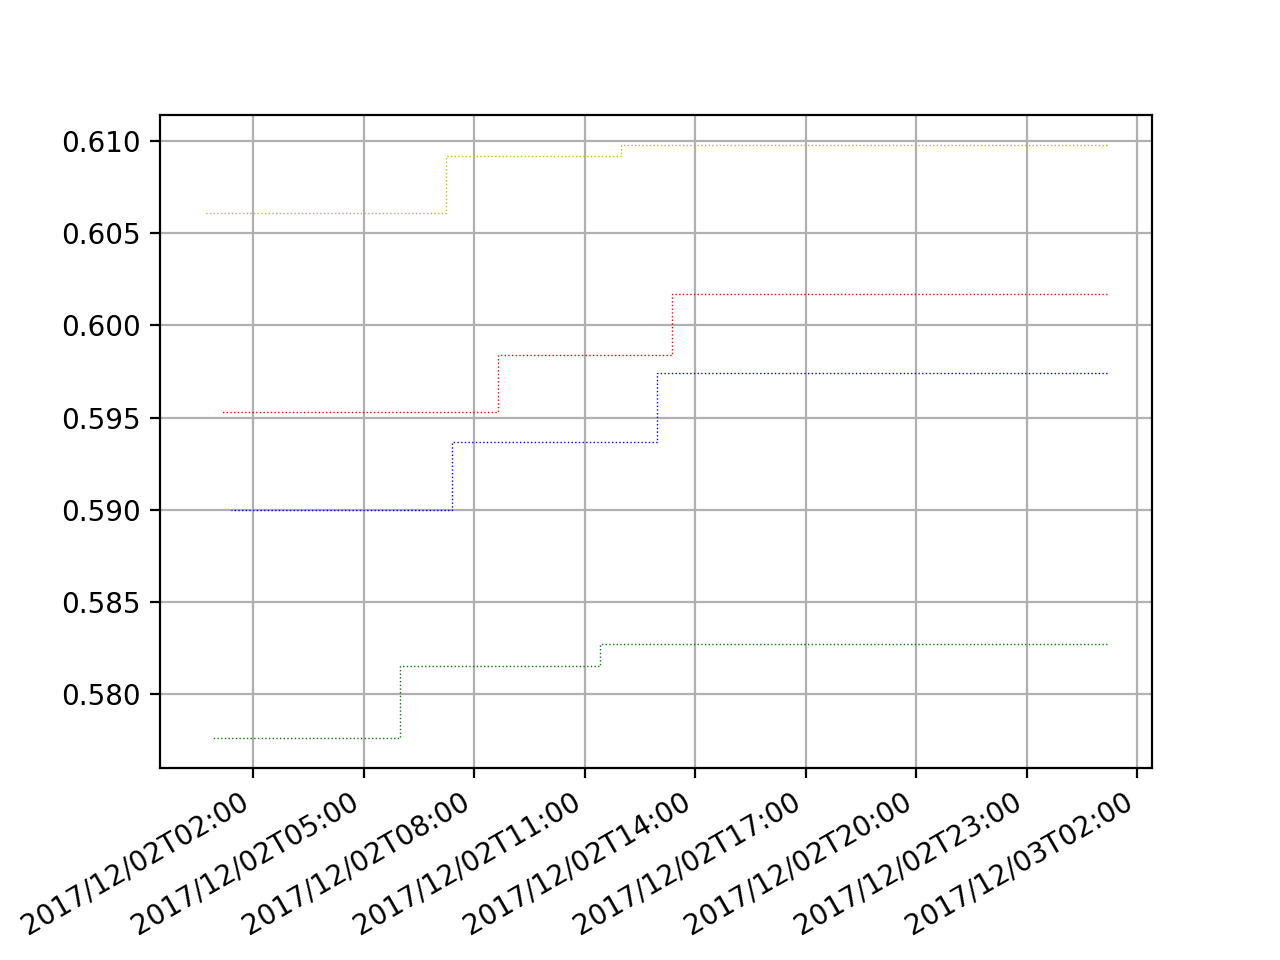

In [14]:
#x = data[:,0]
#y = data[:,1]
z = data[:,2]
colors=["r-","g-","b-","y-"]
regions = np.unique(z)
color_counter=0
plt.close('all')
plt.interactive(False)
fig, ax = plt.subplots(1)
fig.autofmt_xdate()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%dT%H:%M'))

now = datetime.datetime.now()
now = mdates.date2num(now)
for region in regions:
    print region
    subarray=data[data[:,2] == region]
    #print subarray
    x = mdates.date2num(subarray[:,0])
    x = np.append(now, x)
    print x
    y = subarray[:,1]
    y =np.append(y[0],y)
    ax.plot_date(x,y,fmt=colors[color_counter],
                  drawstyle="steps-pre",linestyle="dotted",linewidth=0.5)
    color_counter+=1
ax.grid() 
#plt.show()

In [15]:
plt.savefig("ffp.pdf")